# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Martín Calvo
*Métodos computacionales 2025-I*

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad, dblquad
from scipy.interpolate import CubicSpline, lagrange
from scipy.special import roots_legendre
import pandas as pd

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [ ]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
L=0.98
R=0.142


def d3puntos(f,x,h=1e-5):
  if abs(h)<1e-12:
    raise ValueError("h demasiado pequeña")

  derivada=np.zeros_like(x,dtype=float)
  for i in range(len(x)):

    if x[i]==min(x):
      derivada[i]=(-3*f(x[i])+4*f(x[i]+h)-f(x[i]+2*h))/(2*h)

    elif x[i]==max(x):
      derivada[i]=(3*f(x[i])-4*f(x[i]-h)+f(x[i]-2*h))/(2*h)

    else:
      derivada[i]=(f(x[i]+h)-f(x[i]-h))/(2*h)

  return derivada

idet=CubicSpline(t,i)

did3=d3puntos(idet,t)

did3=CubicSpline(t,did3)

derivadas3=did3(t)

Voltaje=L*derivadas3+R*i

df=pd.DataFrame({"Tiempo":t,"Corriente":i, "Voltaje":Voltaje})
df

,Tiempo,Corriente,Voltaje
0,1.00,3.10,3.216866
1,1.01,3.12,1.994707
2,1.02,3.14,3.222547
3,1.03,3.18,5.433227
4,1.04,3.24,7.156747


# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [ ]:
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
r=CubicSpline(t,x)

v=np.gradient(x,t)

vfunction=CubicSpline(t,v)

v12=vfunction(12)

for i in range(0,len(t)):
  if t[i]>12:
    print(f"v(12) = {v12:.4f}")
  print(f"v({t[i]}) = {v[i]:.4f}")

v(0) = 75.0000
v(3) = 77.4000
v(5) = 79.4000
v(8) = 67.7000
v(10) = 69.1667
v(12) = 78.2966
v(13) = 83.6667


# 3.
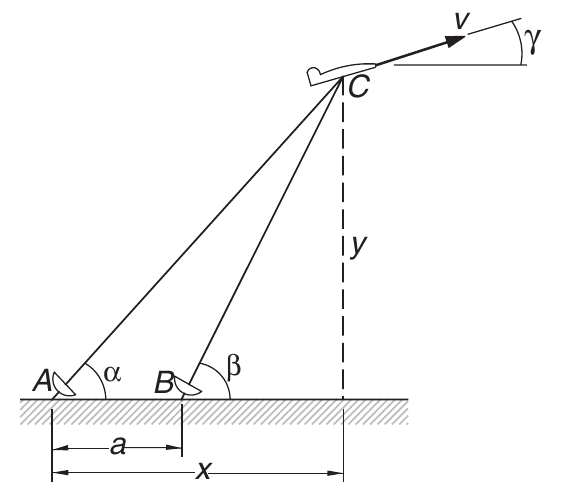


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [ ]:
a=500
t= np.array([9, 10, 11])
alpha= (np.pi/180)*np.array([54.80, 54.06, 53.34])
beta= (np.pi/180)*np.array([65.59, 64.59, 63.62])

x=np.zeros_like(alpha)
y=np.zeros_like(alpha)

for i in range(len(alpha)):
  x[i]=(a*np.tan(beta[i]))/(np.tan(beta[i])-np.tan(alpha[i]))
  y[i]=(a*(np.tan(alpha[i])*np.tan(beta[i])))/(np.tan(beta[i])-np.tan(alpha[i]))
vx=np.gradient(x,t)
vy=np.gradient(y,t)
v=np.sqrt(vx[1]**2+vy[1]**2) #Velocidad en t=10s
gamma=np.arcsin(vy[1]/v) #La diferencia entre hacerlo con seno o con coseno es del orden de 10^16

print(f"La velocidad en t=10 es v={v:.2f}m/s, el ángulo de acenso en ese momento es aproximadamente {gamma/np.pi:.2f} π radianes, o {gamma*(180/np.pi):.2f}°")

La velocidad en t=10 es v=50.10m/s, el ángulo de acenso en ese momento es aproximadamente 0.08 π radianes, o 15.14°


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [ ]:
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s

a_array=np.gradient(v,t)
a_funcion=CubicSpline(t,a_array)
a28=a_funcion(28)

r=trapezoid(v[0:8],t[0:8])

print(f"La aceleración cuando t=28 es {a28:.5f}m/s^2")
print(f"La distancia recorrida desde t=0 hasta t=28 es {r:.4f}m")

La aceleración cuando t=28 es 1.72500m/s^2
La distancia recorrida desde t=0 hasta t=28 es 2309.0000m


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [ ]:
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³
Z = z[-1]  # profundidad total (16 m)

A=-np.gradient(V,z)
V_T=simpson(A,z)

arg=(A*c)
cpromedio=simpson(arg,z)/V_T
print(f"c = {cpromedio:.4f}")


c = 8.0973


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [ ]:
def trapezoid_error(f,a,b,epsilon):
  """
  Garantiza que la función trapezoid  tenga un error determinado, comparándolas con una iteración previa
  f es la función que se va a integrar
  a y b son los límites de integración
  epsilon es la tolerancia
  """
  h=50
  hache=100
  while True:
    r=np.linspace(a,b,h)
    erre=np.linspace(a,b,hache)
    if abs(trapezoid(f(r),r)-trapezoid(f(erre),erre))<epsilon:
      return trapezoid(f(erre),erre)
    h=hache
    hache*=10
def simpson_error(f,a,b,epsilon):
  """
  Garantiza que la función trapezoid  tenga un error determinado, comparándolas con una iteración previa
  f es la función que se va a integrar
  a y b son los límites de integración
  epsilon es la tolerancia
  """
  h=50
  hache=100
  iter=1
  while True:
    r=np.linspace(a,b,h)
    erre=np.linspace(a,b,hache)
    if abs(simpson(f(r),r)-trapezoid(f(erre),erre))<epsilon:
      return simpson(f(erre),erre)
    h=hache
    hache*=10
    iter+=1


p=lambda r: (100/8)*(r**2)*((2-r)**2)*np.exp(-r)
for i in range(10,26):
  Ptrapezoide=trapezoid_error(p,0, i,1e-6) #Se usa la función que hice para garantizar el error
  Psimpson=simpson_error(p,0, i,1e-6)
  Pquad=quad(p,0,i)[0]
  print("--------------------------------")
  print(f"La probabilidad calculada con trapezoid es {Ptrapezoide:.4f}%")
  print(f"La probabilidad calculada con simpson es {Psimpson:.4f}%")
  if quad(p,0,i)[1]<1e-6:  #Acá se ve que el error de quad dado por la función siempre sea menor que el que se pide
    print(f"La probabilidad calculada con quad es {Pquad:.4f}%")


--------------------------------
La probabilidad calculada con trapezoid es 94.0481%
La probabilidad calculada con simpson es 94.0481%
La probabilidad calculada con quad es 94.0481%
--------------------------------
La probabilidad calculada con trapezoid es 96.8223%
La probabilidad calculada con simpson es 96.8223%
La probabilidad calculada con quad es 96.8223%
--------------------------------
La probabilidad calculada con trapezoid es 98.3552%
La probabilidad calculada con simpson es 98.3552%
La probabilidad calculada con quad es 98.3552%
--------------------------------
La probabilidad calculada con trapezoid es 99.1708%
La probabilidad calculada con simpson es 99.1708%
La probabilidad calculada con quad es 99.1708%
--------------------------------
La probabilidad calculada con trapezoid es 99.5913%
La probabilidad calculada con simpson es 99.5913%
La probabilidad calculada con quad es 99.5913%
--------------------------------
La probabilidad calculada con trapezoid es 99.8025%
La pr

# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

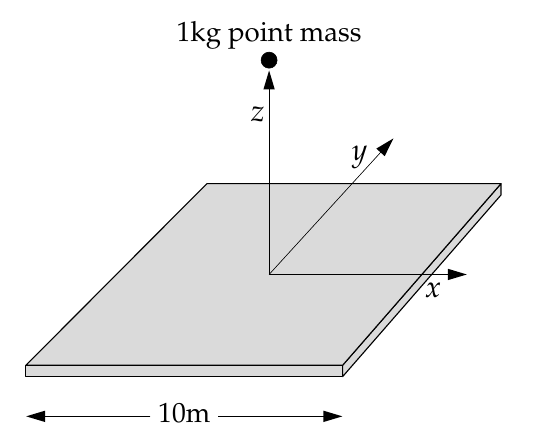

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


/tmp/ipython-input-20-3655035720.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  integrando=lambda x:1/((x**2 +y**2+z**2)**(3/2))
/tmp/ipython-input-20-3655035720.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  Fz=lambda z: G*sigma*z*integral_y(z)


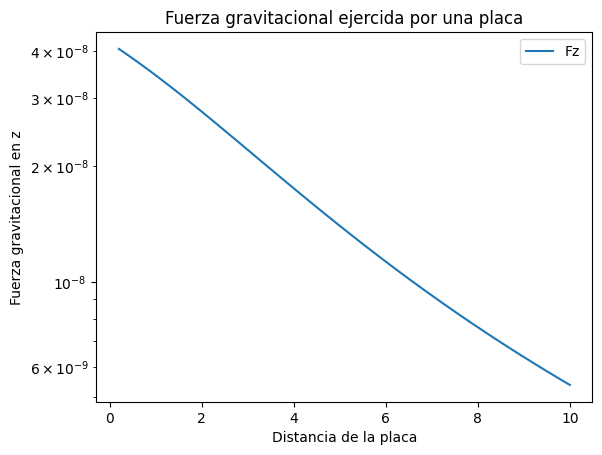

Fz(1)=3.45e-08
Fz(2)=2.77e-08
Fz(3)=2.21e-08
Fz(4)=1.75e-08
Fz(5)=1.40e-08
Fz(6)=1.13e-08
Fz(7)=9.20e-09
Fz(8)=7.60e-09
Fz(9)=6.36e-09
Fz(10)=5.38e-09


In [ ]:
G=6.674e-11
M=10000
L=10
sigma=M/(L**2)
z=np.linspace(0,10,dtype=float)

def integral_x(z,y):
  integrando=lambda x:1/((x**2 +y**2+z**2)**(3/2))
  return quad(integrando,-L/2,L/2)[0]
def integral_y(z):
  integrando=lambda y:integral_x(z,y)
  return quad(integrando,-L/2,L/2)[0]
Fz=lambda z: G*sigma*z*integral_y(z)
efezeta=[]
for i in z:
  efezeta.append(Fz(i))

plt.semilogy(z,efezeta, label="Fz")
plt.xlabel("Distancia de la placa")
plt.ylabel("Fuerza gravitacional en z")
plt.title("Fuerza gravitacional ejercida por una placa")
plt.legend()
plt.show()

for i in range(1,11):
  print(f"Fz({i})={Fz(i):.2e}")